# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {Sinoth Hlayisani Mabasa}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [221]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.correlation import plot_corr
%matplotlib inline

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn import ensemble

#Libraries for Model Performance
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

#Library for creating pickle files of the models
import pickle as pkl

# Setting global constants to ensure notebook results are reproducible
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [222]:
# loading the two dataset
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [223]:
#Reading train_data
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [224]:
#Reading test_data
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [225]:
#Checking the shape of the train_data
df_train.shape

(8763, 49)

Train data has 8763 features and 49 columns

In [226]:
#Checking the shape of test_data
df_test.shape

(2920, 48)

Test data have 2920 features and 48 columns

In [227]:
#Checking data type for each column on train_data
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

This shows that there are 46 columns of numerical types and 3 columns of Catergorical types and valencia_pressure has some missing values. The target variable is Numerical and float type

Key take-away:

* categorical variables: 3 columns of Catergorical types(Seville_pressure,Valencia_wind_deg and time)
numerical variables: 46 columns of numerical types


In [228]:
#Checking data type for each column on test_data
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

Key take-away:

* categorical variables: 3 columns of Catergorical types(Seville_pressure,Valencia_wind_deg and time)
* numerical variables: 45 columns of numerical types
* missing data:1 (valencia_pressure has some missing values)

In [229]:
#checking for possible missing values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Key Observations:

* missing data: valencia_pressure has some missing values
* We hope to fill up these missing values using either mean or median in the featutre engineering section of the notbook.

In [230]:
#Checking missing values on test_data
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

Key Observations:

* missing data: valencia_pressure has some missing values
* We hope to fill up these missing values using either mean or median in the featutre engineering section of the notbook.

In [231]:
train_df= df_train.copy()

In [232]:
#missing training_data and its percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

,Total,Percent
Valencia_pressure,2068,0.235992
Unnamed: 0,0,0.000000
Madrid_weather_id,0,0.000000
Bilbao_pressure,0,0.000000
Seville_weather_id,0,0.000000


Valencia_ pressure(train data) is the only feature with missing entries of 23.6%

In [233]:
#Missing entries in test data and its percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

,Total,Percent
Valencia_pressure,454,0.155479
Unnamed: 0,0,0.000000
time,0,0.000000
Barcelona_weather_id,0,0.000000
Bilbao_pressure,0,0.000000


Valencia_pressure(test data) is the only feature with missing of 15.5%

Seperation of features based on Data type

In [234]:
# seperation of Numerical features and catergorical features in the train data
numbers = ['int64', 'float64']
df_num_train = df_train.select_dtypes(include=numbers)# select numerical feature
df_cat_train= df_train.select_dtypes(include='object')# select catergorical features

In [235]:
# seperation of Numerical features and catergorical features in the test data
numbers = ['int64', 'float64']
df_num_test = df_test.select_dtypes(include=numbers)# select numerical feature
df_cat_test= df_test.select_dtypes(include='object')# select catergorical features

Performing a Descriptive Statistics of Features

In [236]:
# look at data statistics
df_num_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


Looking at our data, we can infer the following:

* We can tell from the Mean(average) that some of the columns such as Barcelona Pressure, Bilbao Pressure, * Valencia Pressure etc. show very large values which is far from the range.
* This is evident also in their maximum values which would infer the presence of outliers.

We would have to confirm this in our next analysis

* Checking Skewness/Kurtosis and Outliers
* Skewness is simply the measure of symmetry or more precisely, the lack of symmetry.

* Kurtosis is the measure of how heavy its tails are compared to a normal distribution

<AxesSubplot:>

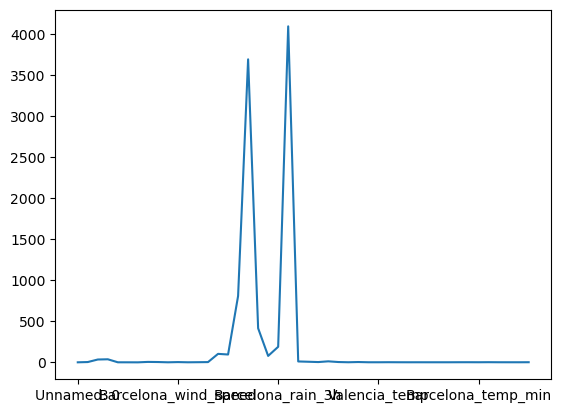

In [237]:
df_train.kurtosis().plot()

In [238]:
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Key Observation:

* Below are features with large numbers of outliers as shown by kurtosis > 3;
* Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.

* The outliers observed in Barcelona_pressure are definitely due to some sort of error, as a pressure of 3687.564230 is too high. 
* The maximum pressure recorded in history is 1084, and the maximum pressure for the other cities in the dataset are also below this value.
* This value can be replaced or dropped during data engineering.
* Valencia_wind_speed has a maximum of 52, there is also something wrong with that value. 
* The highest wind speed recorded in history is 20.This value should also be replaced or dropped.
* The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the data was collected and hence we can leave them.

Univariate Analysis

<Figure size 1200x480 with 0 Axes>

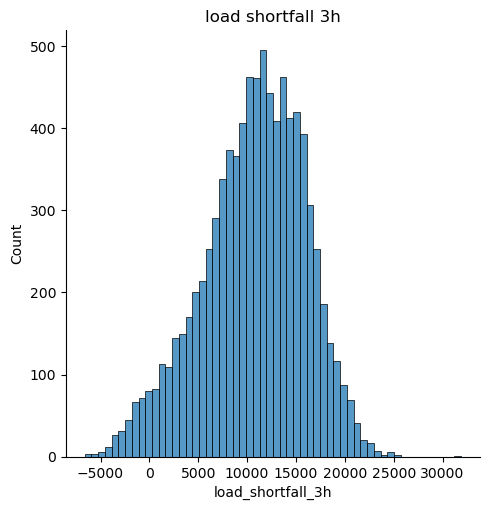

In [239]:
# Distribution of train data target variable
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
sns.displot(df_train['load_shortfall_3h'])
plt.title('load shortfall 3h')
plt.show()

Key observation:

* The target variable(train data) is fairly symetrical

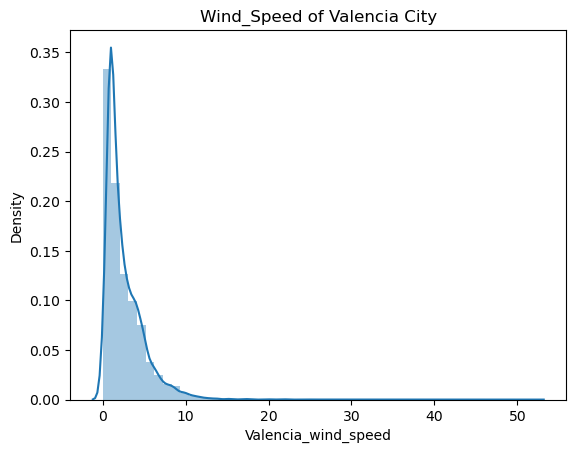

In [240]:
sns.distplot(df_train['Valencia_wind_speed'])
plt.title('Wind_Speed of Valencia City')
plt.show()

Valencia_wind_speed is positively skewwed

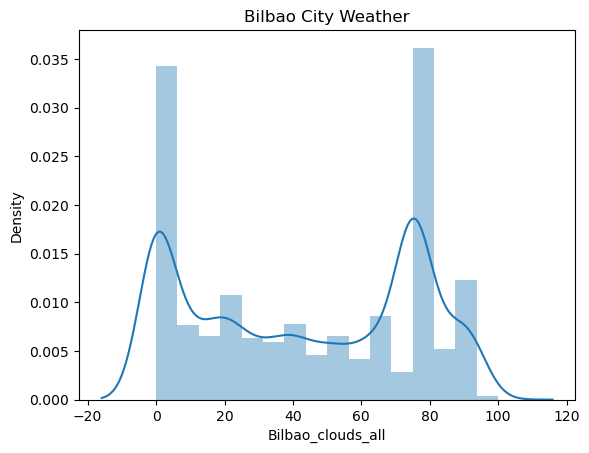

In [241]:
sns.distplot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
plt.show()

Multivariate Analysis

<AxesSubplot:>

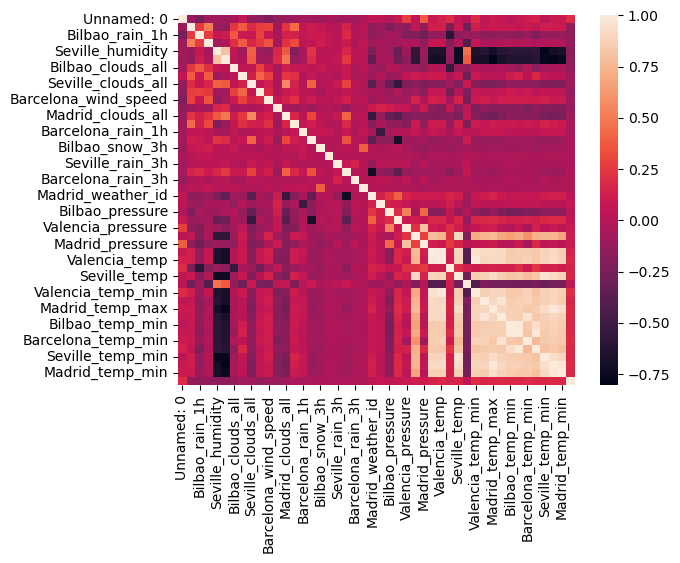

In [242]:
# evaluate correlation
# Correlation heat map showing relationship among variables in train data(Numerical)
sns.heatmap(df_num_train.corr())

Key Observation:

* First, we can easily tell the presence of high correlation (in pink) between features on the heatmap at the bottom right corner of our graph
* A breakdown of handling such occurence will be discussed in the feature engineering section of the notebook
* It is important to consider this step when choosing the best features which in turn would result to an improvement of our model.

In [243]:
# Getting a bigger view 
heatmap_corr=df_num_train.corr()
heatmap_corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

A few train data features was chosen at random to show and understand how the datas are distributed

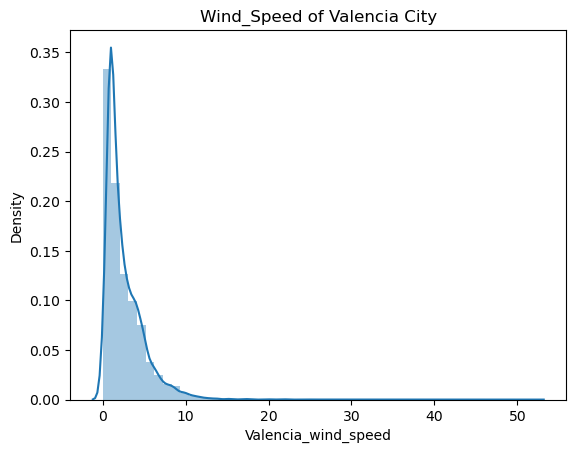

In [244]:
sns.distplot(df_train['Valencia_wind_speed'])
plt.title('Wind_Speed of Valencia City')
plt.show()

This shows that wind_speed across Valencia_city are not normally distributed (unevenly distributed ) and skewed to the right

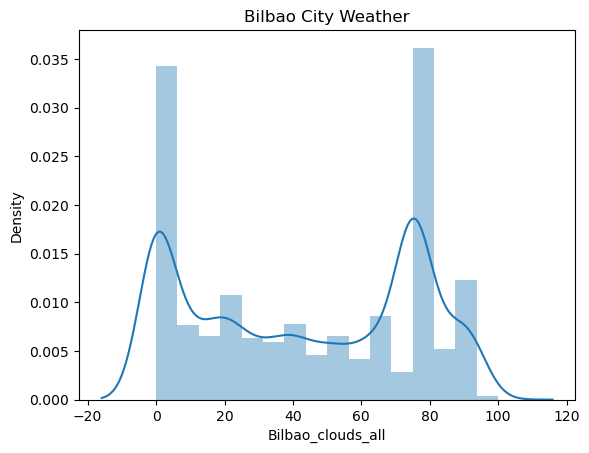

In [245]:
sns.distplot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
plt.show()

This shows that cloud_coverage across all cities in spain are not normally distributed.

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

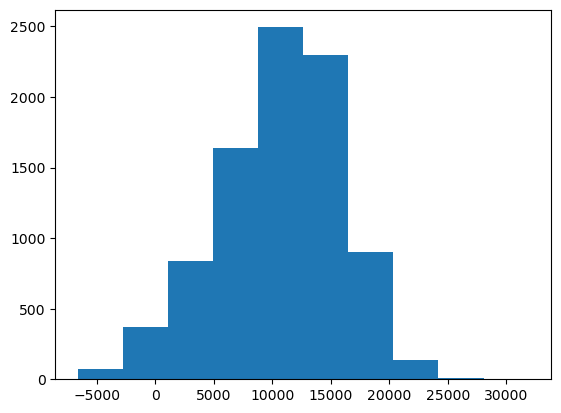

In [246]:
plt.hist(df_train['load_shortfall_3h'])

Uniques features and how its interact with the target Variable

In [247]:
#Creating temporary timescales
df_train['time'] = pd.to_datetime(df_train.time)
df_train['Year'] = df_train[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
df_train['Month'] = df_train[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
df_train['Day'] = df_train[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
df_train['Hours'] = df_train[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)

# Harvesting unique features in the train data
cloud =[]
temp= []
speed= []
rain= []
for col in df_num_train.columns:
    if "cloud" in col:
        cloud.append(col)
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
for i in cloud:
    temp.append(i)
for col in df_train.columns:
    if "speed" in col:
        speed.append(col)
for col in df_train.columns:
    if "rain_3h" in col:
        rain.append(col)

df_train[temp].head()

,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all
0,269.888000,274.254667,281.013000,269.338615,265.938000,0.0,0.0,0.0
1,271.728333,274.945000,280.561667,270.376000,266.386667,0.0,0.0,0.0
2,278.008667,278.792000,281.583667,275.027229,272.708667,0.0,0.0,0.0
3,284.899552,285.394000,283.434104,281.135063,281.895219,0.0,0.0,0.0
4,283.015115,285.513719,284.213167,282.252063,280.678437,2.0,0.0,0.0


In [248]:
cloud =[]
for col in df_train.columns:
    if "cloud" in col:
        cloud.append(col)
df_train[cloud].head(1)

,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all
0,0.0,0.0,0.0


In [249]:
temp= []
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
temp.append("Year")
temp.append("Month")
temp.append("load_shortfall_3h")
for i in cloud:
    temp.append(i)
groupsp= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["total temp"]=( groupsp["Valencia_temp"]+groupsp["Seville_temp"]+groupsp["Barcelona_temp"]+groupsp["Bilbao_temp"]
                     +groupsp["Madrid_temp"])/5
groupsp["total cloud"]= (groupsp["Bilbao_clouds_all"]+groupsp["Seville_clouds_all"]+groupsp["Madrid_clouds_all"])/3
groupsp.tail(1)

,Year,Month,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all,total temp,total cloud
35,2017,12,283.713895,283.420023,281.514933,280.072594,278.887647,10041.087366,54.913978,16.775538,24.333333,281.521818,32.007616


In [250]:
#group= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["Year"]= groupsp["Year"].astype("str")
groupsp["Month"]=groupsp["Month"].astype("str")
groupsp["Ym"]= groupsp["Year"]+ "/"+ groupsp["Month"]
groupsp["Ym"].head()

0    2015/1
1    2015/2
2    2015/3
3    2015/4
4    2015/5
Name: Ym, dtype: object

Drop redundant features

Feature Bilbao_temp_max and Bilbao_temp_min are dropped as they are direct reflection of the Bilbao_temp.( this applies to all temperature readings from all the regions). Additionally,Unnamed, Madrid_weather_id, Barcelona_weather_id,Seville_weather_id and Bilbao_weather_id are dropped because they doesn’t bring any values to the prediction.

In [251]:
group= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
group["Ym"].head()

0    2015/1
1    2015/2
2    2015/3
3    2015/4
4    2015/5
Name: Ym, dtype: object

In [252]:
group.head(1)

,Year,Month,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all,Ym
0,2015,1,281.831187,281.452116,284.348488,278.151775,275.065128,9567.351701,52.891156,22.27619,22.303401,2015/1


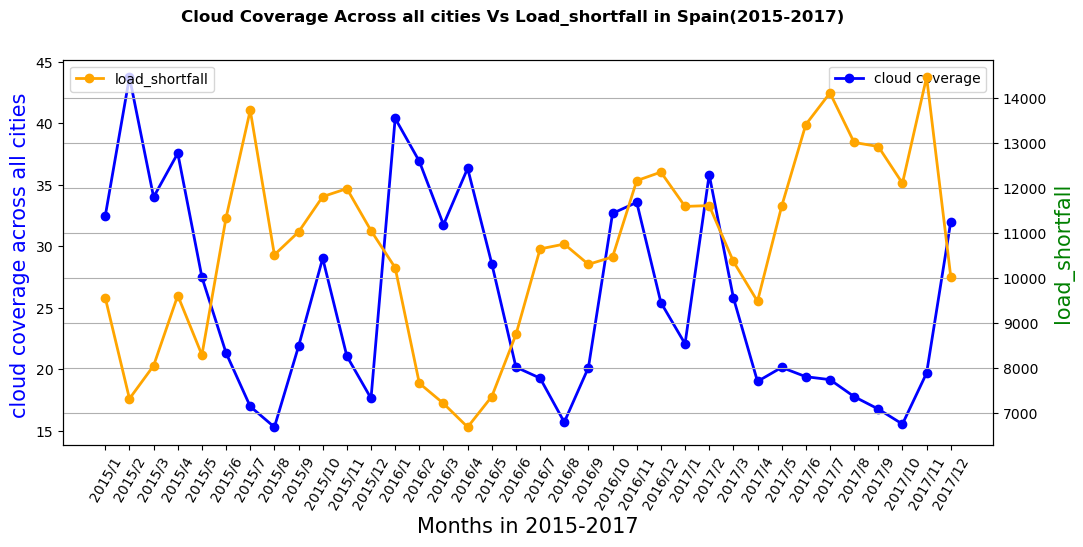

In [253]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(groupsp["Ym"], groupsp['total cloud'] ,
        color='b', linewidth=2, marker='o', label="cloud coverage")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('cloud coverage across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()
l=groupsp["load_shortfall_3h"].loc[0:37]
# Now, plot the second line with ax2 axes
ax2.plot([col for col in range(len(l))],
         l,
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=9)
fig.suptitle('Cloud Coverage Across all cities Vs Load_shortfall in Spain(2015-2017)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

In [255]:
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
group["Ym"].head(1)

0    2015/1
Name: Ym, dtype: object

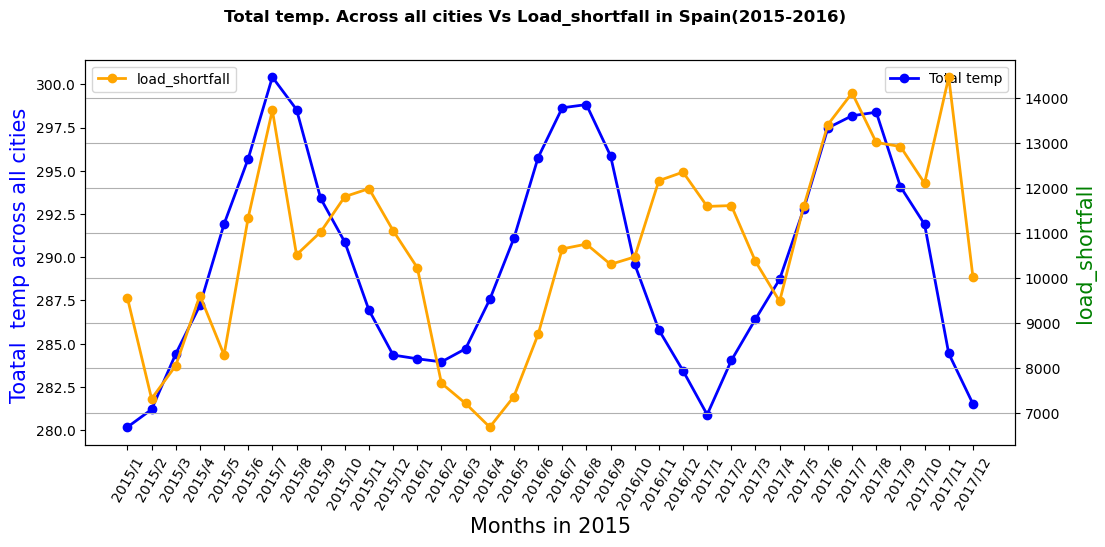

In [256]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(groupsp['Ym'], groupsp["total temp"],
        color='b', linewidth=2, marker='o', label="Total temp")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015', fontsize=15)
ax.set_ylabel('Toatal  temp across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Total temp. Across all cities Vs Load_shortfall in Spain(2015-2016)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

In [258]:
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
# group["Ym"].head()
speed= []
for col in df_train.columns:
    if "speed" in col:
        speed.append(col)
speed
speed.append("Year")
speed.append("Month")
speed.append("load_shortfall_3h")
groupsp= df_train[speed].groupby(["Year", "Month"], as_index= False).mean()
groupsp["Avg_Wind_speed"]= (groupsp.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)
groupsp["Ym"]= group["Ym"]
groupsp.head()

,Year,Month,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed,load_shortfall_3h,Avg_Wind_speed,Ym
0,2015,1,2.191837,4.776871,1.651701,2.289796,3.004082,9567.351701,2.782857,2015/1
1,2015,2,3.614114,5.929429,1.827327,3.033033,3.241742,7327.774775,3.529129,2015/2
2,2015,3,2.475806,2.579301,1.090054,4.055780,2.393145,8062.243280,2.518817,2015/3
3,2015,4,2.919444,2.290278,1.162500,2.643056,2.408333,9621.084722,2.284722,2015/4
4,2015,5,3.263441,2.067204,1.295699,2.981183,2.778226,8300.656586,2.477151,2015/5


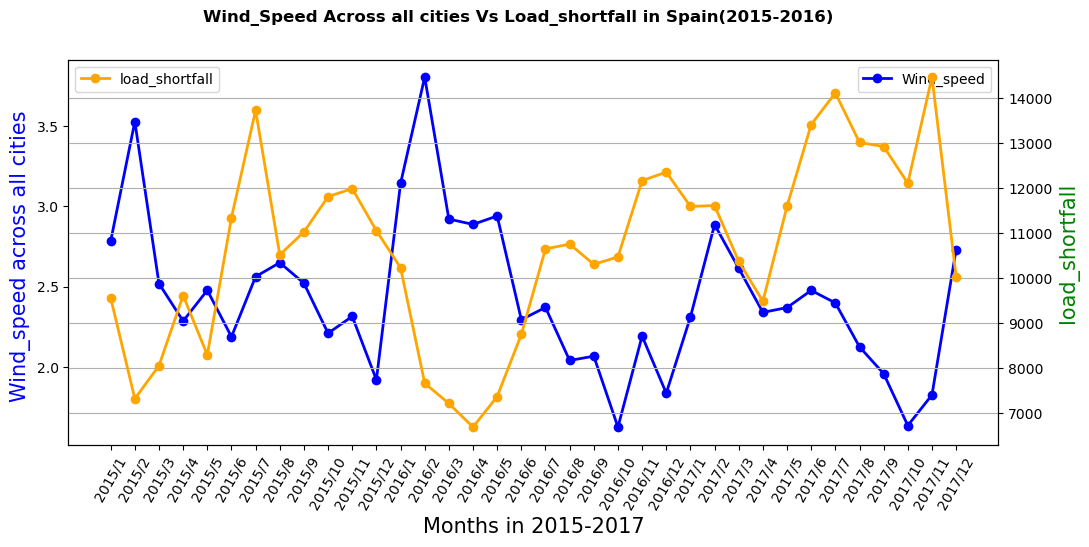

In [259]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], groupsp["Avg_Wind_speed"].loc[0:37],
        color='b', linewidth=2, marker='o', label="Wind_speed")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Wind_speed across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Wind_Speed Across all cities Vs Load_shortfall in Spain(2015-2016)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

In [261]:
rain= []
for col in df_train.columns:
    if "rain_3h" in col:
        rain.append(col)

rain.append("Year")
rain.append("Month")
rain.append("load_shortfall_3h")
rains= df_train[rain].groupby(["Year", "Month"], as_index= False).mean()
rains["rain_3h"]= (rains.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)
rains
groupsp["Ym"]= group["Ym"]
groupsp.head()

,Year,Month,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed,load_shortfall_3h,Avg_Wind_speed,Ym
0,2015,1,2.191837,4.776871,1.651701,2.289796,3.004082,9567.351701,2.782857,2015/1
1,2015,2,3.614114,5.929429,1.827327,3.033033,3.241742,7327.774775,3.529129,2015/2
2,2015,3,2.475806,2.579301,1.090054,4.055780,2.393145,8062.243280,2.518817,2015/3
3,2015,4,2.919444,2.290278,1.162500,2.643056,2.408333,9621.084722,2.284722,2015/4
4,2015,5,3.263441,2.067204,1.295699,2.981183,2.778226,8300.656586,2.477151,2015/5


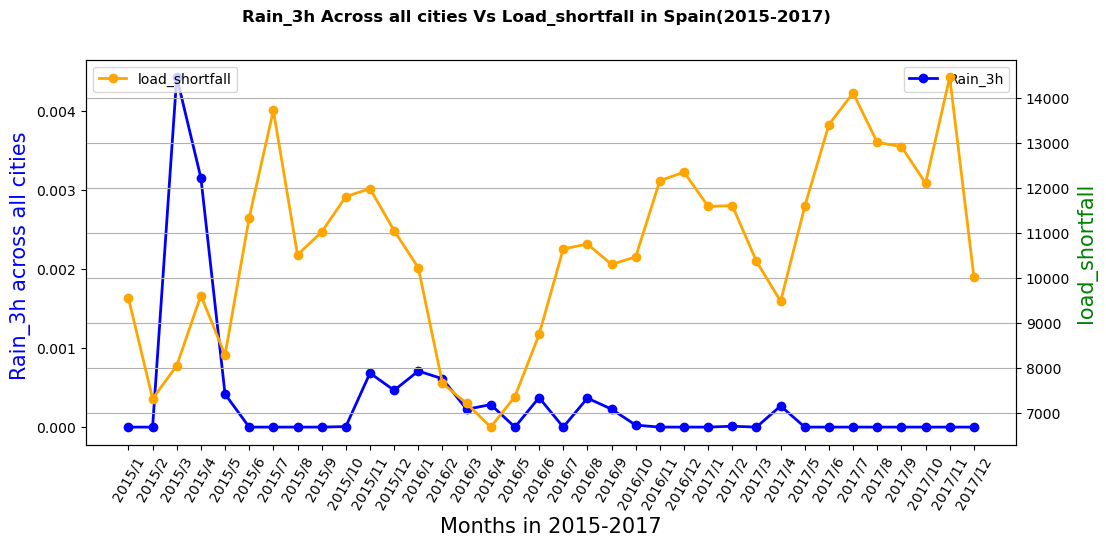

In [262]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], rains["rain_3h"],
        color='b', linewidth=2, marker='o', label="Rain_3h")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Rain_3h across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Rain_3h Across all cities Vs Load_shortfall in Spain(2015-2017)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Total load shortfall per year')

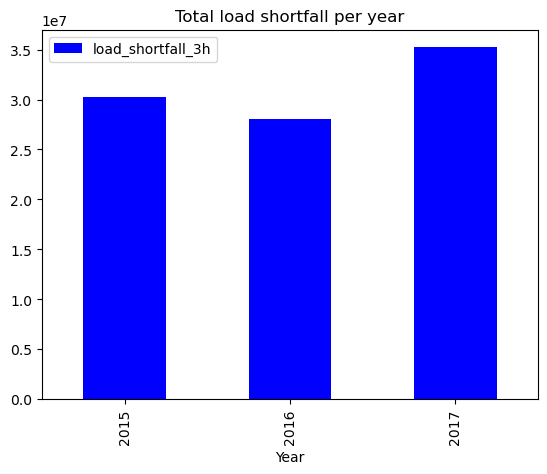

In [263]:
df_train[['Year',
 'load_shortfall_3h']].groupby('Year').sum().plot.bar(color='blue')
plt.title('Total load shortfall per year')

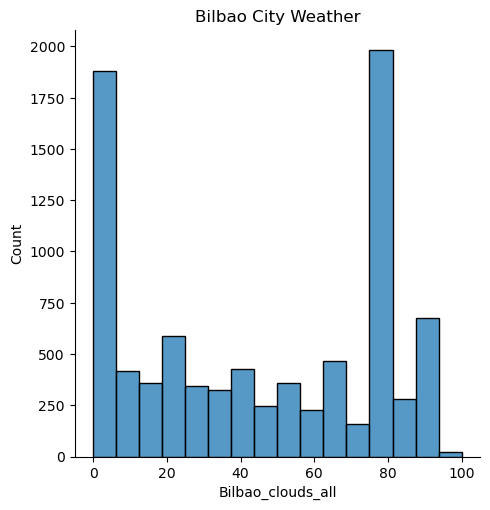

In [264]:
sns.displot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
plt.show()

In [265]:
import plotly.express as px
fig = px.histogram(df_train, 
                   x=df_train['load_shortfall_3h'], 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of 3 hour load shortfall ')
fig.update_layout(bargap=0.90)
fig.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [266]:
#Drop the index column
train_df = train_df.drop(['Unnamed: 0'], axis=1)
#create a copy 
train_copy_df = train_df.copy(deep = True)

In [267]:
train_copy_df['Valencia_pressure'].corr(train_copy_df['Madrid_pressure'])

0.7992719089123174

In [268]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].describe()

,Madrid_pressure,Valencia_pressure
count,8763.000000,6695.000000
mean,1010.316920,1012.051407
std,22.198555,9.506214
min,927.666667,972.666667
25%,1012.333333,1010.333333
50%,1017.333333,1015.000000
75%,1022.000000,1018.000000
max,1038.000000,1021.666667


From the correlation matrix we saw early ,Madrid_pressure and Velencia_pressure are collinear. This gives more reason to replace the missing values in Valencia_pressure column with values from Madrid_pressure

In [269]:
train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

train_copy_df['Valencia_pressure'].isna().sum()

0

Creating New Features

* First,we will be spliting 'time' faeture to month Day of the week, Year and Hours. These new features will give us more insight since weather vary from month to month in a year.

* Month feature will help us determine the change in energy per season
* The years feature may show a rate of change in energy supplied from renewable & fossil fuel sources.
* Hourly charts shal provide the most relevant hours of the day when load shortfalls occur.

In [270]:
# create new features
# Extracting year from time column 
train_copy_df['time'] = pd.to_datetime(train_copy_df.time)
train_copy_df['Year'] = train_copy_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
train_copy_df['Month'] = train_copy_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
train_copy_df['Day'] = train_copy_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df['Hours'] = train_copy_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df.shape
#Let us Create new season features

train_copy_df.loc[train_copy_df['Month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
train_copy_df.loc[train_copy_df['Month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
train_copy_df.loc[train_copy_df['Month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
train_copy_df.loc[train_copy_df['Month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

train_copy_df = train_copy_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)

In [271]:
#Replicate the process for the test data
test_df = pd.read_csv("df_test.csv")
test_df.loc[test_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     test_df.loc[test_df['Valencia_pressure'].isna(), 'Madrid_pressure']
test_df['time'] = pd.to_datetime(test_df.time)
test_df['Year'] = test_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
test_df['Day'] = test_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
test_df['Month'] = test_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)

test_df['Hours'] = test_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
test_df.loc[test_df['Month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
test_df.loc[test_df['Month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
test_df.loc[test_df['Month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
test_df.loc[test_df['Month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

test_df = test_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)
test_df.shape
test_df
test_dummies = pd.get_dummies(test_df)
test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]
test_df.shape
test_df

test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]

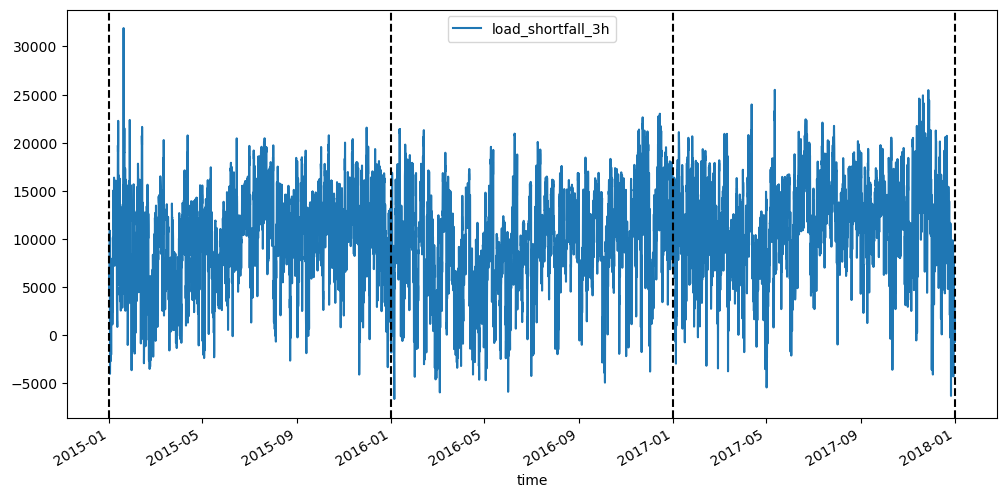

In [272]:
#seasonality
ax = train_copy_df.plot(x='time', y='load_shortfall_3h', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01']
for dt in xcoords:
    plt.axvline(x=dt, color='black', linestyle='--')

A keen eye might already see from this plot that the 3 hour load shortfall seem to dip around the new year and peak a few months before. Let’s dive a little further into this by plotting a vertical line for January of every year.

<AxesSubplot:xlabel='Day', ylabel='load_shortfall_3h'>

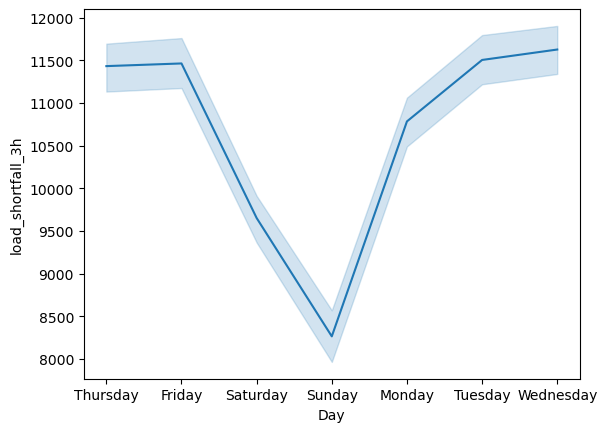

In [273]:
#Next, let’s group the 3 hour load shortfall time series by day of the week, to explore weekly seasonality.
sns.lineplot(train_copy_df['Day'], train_copy_df['load_shortfall_3h'])

Load_shortfall_3h is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

Encoding categorical features

In [274]:
def remover (df):
    if "_" in df:
        return float(df. split("_")[1].strip())
    else:
        return float(df. split("p")[1].strip());
train_copy_df["Valencia_wind_deg"]=train_copy_df["Valencia_wind_deg"].apply(remover)
train_copy_df["Seville_pressure"]= train_copy_df["Seville_pressure"].apply(remover)

In [275]:
def remover (df):
    if "_" in df:
        return float(df. split("_")[1].strip())
    else:
        return float(df. split("p")[1].strip());
test_df["Valencia_wind_deg"]=test_df["Valencia_wind_deg"].apply(remover)
test_df["Seville_pressure"]= test_df["Seville_pressure"].apply(remover)

In [276]:
train_copy_df.columns = [col.replace(" ","_") for col in train_copy_df.columns] 
train_copy_df.shape

(8763, 56)

In [277]:
test_df.columns = [col.replace(" ","_") for col in test_df.columns]

In [278]:
column_titles = [col for col in train_copy_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_copy_df = train_copy_df.reindex(columns = column_titles)
train_copy_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,Year,Month,Day,Hours,winter,spring,summer,autumn,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,2015,1,Thursday,3,1,0,0,0,6715.666667
1,2015-01-01 06:00:00,0.333333,10.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,2015,1,Thursday,6,1,0,0,0,4171.666667
2,2015-01-01 09:00:00,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,2015,1,Thursday,9,1,0,0,0,4274.666667
3,2015-01-01 12:00:00,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,2015,1,Thursday,12,1,0,0,0,5075.666667
4,2015-01-01 15:00:00,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,2015,1,Thursday,15,1,0,0,0,6620.666667


.Feature Selection
SelectKBest Model

In [279]:
train_copy_df = train_copy_df.drop(['time', 'Day'], axis='columns')

In [281]:
# Create x, y variable DFs
def create_x_y_features(train_copy_df = train_copy_df):
    train_df = train_copy_df.copy(deep = True)
    Y_var = train_df['load_shortfall_3h']
    X_var = train_df[[i for i in train_df if i not in 'load_shortfall_3h']]

    return train_df, Y_var , X_var

In the below function, we are using the SelectKBest library to helps determine the best 50 features in our data. The method considers the features based their F-scores result.

In [283]:
def select_k_best(data_df):
    data_df, Y_var, X_var = create_x_y_features(data_df)
    X_train, X_test, y_train, y_test = train_test_split(X_var,
                                                        Y_var,
                                                        test_size= 0.2,
                                                        random_state=42)

    k_best = SelectKBest(score_func= f_regression, k = 50)

    k_best.fit(X_train, y_train)

    X_train_fs, X_test_fs = k_best.transform(X_train), k_best.transform(X_test)
    sns.lineplot([i for i in range(len(k_best.scores_))], k_best.scores_)
    plt.show()
    
    return k_best, X_train_fs, X_test_fs

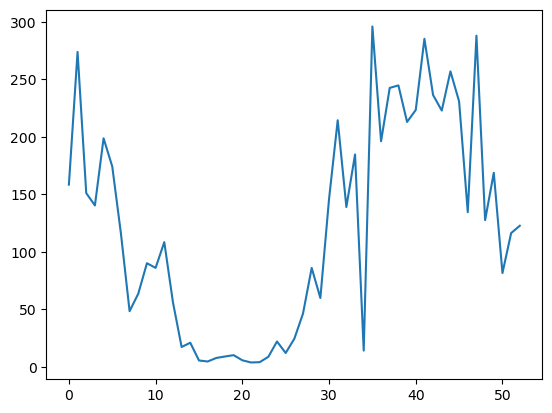

In [284]:
k_best,_,_= select_k_best(train_copy_df)

In [285]:
filter = k_best.get_support()
features = np.array([i for i in train_copy_df.columns if i not in 'load_shortfall_3h'])
 
print("All features before selection:")
print(features)
 
print("The Best 50 selected features are::")
print(features[filter])
print(k_best)

All features before selection:
['Madrid_wind_speed' 'Valencia_wind_deg' 'Bilbao_rain_1h'
 'Valencia_wind_speed' 'Seville_humidity' 'Madrid_humidity'
 'Bilbao_clouds_all' 'Bilbao_wind_speed' 'Seville_clouds_all'
 'Bilbao_wind_deg' 'Barcelona_wind_speed' 'Barcelona_wind_deg'
 'Madrid_clouds_all' 'Seville_wind_speed' 'Barcelona_rain_1h'
 'Seville_pressure' 'Seville_rain_1h' 'Bilbao_snow_3h'
 'Barcelona_pressure' 'Seville_rain_3h' 'Madrid_rain_1h'
 'Barcelona_rain_3h' 'Valencia_snow_3h' 'Madrid_weather_id'
 'Barcelona_weather_id' 'Bilbao_pressure' 'Seville_weather_id'
 'Valencia_pressure' 'Seville_temp_max' 'Madrid_pressure'
 'Valencia_temp_max' 'Valencia_temp' 'Bilbao_weather_id' 'Seville_temp'
 'Valencia_humidity' 'Valencia_temp_min' 'Barcelona_temp_max'
 'Madrid_temp_max' 'Barcelona_temp' 'Bilbao_temp_min' 'Bilbao_temp'
 'Barcelona_temp_min' 'Bilbao_temp_max' 'Seville_temp_min' 'Madrid_temp'
 'Madrid_temp_min' 'Year' 'Month' 'Hours' 'winter' 'spring' 'summer'
 'autumn']
The Best 50 sele

In [286]:
kbest = features[filter]
X = train_copy_df[kbest]
Y = train_copy_df['load_shortfall_3h']
test = test_df[kbest]

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In this section we are going to compare the perfomace of the following three models

* Ordinary Linear Regression
* Decision Trees
* Random Forest

1. Ordinary Least Squares Linear Regression model

* First,we will use the below function to separate our data set into features and lables

* We will then proceed to define the string fomular for our model which we will proceed to fit on the variables that have been selected with the help of below function:

In [288]:
# Creating train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 1)

from statsmodels.formula.api import ols

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in X.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Valencia_wind_deg + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_pressure + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Year + Month + Hours + winter + spring + summer + autumn


In [289]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=train_copy_df)
fitted = model.fit()
Y_pred1 = fitted.predict(test)
# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     38.79
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:17:22   Log-Likelihood:                -86579.
No. Observations:                8763   AIC:                         1.733e+05
Df Residuals:                    8713   BIC:                         1.736e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.187e+05 

In [290]:
#Create a dataframe of the predictions and time
Resultsdict1 = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred1}
pred_df1 = pd.DataFrame(data = Resultsdict1)
pred_df1

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9172.540352
1,2018-01-01 03:00:00,8779.216438
2,2018-01-01 06:00:00,9889.631049
3,2018-01-01 09:00:00,9803.135589
4,2018-01-01 12:00:00,9268.021704
...,...,...
2915,2018-12-31 09:00:00,9480.275790
2916,2018-12-31 12:00:00,11944.171140
2917,2018-12-31 15:00:00,14004.746928
2918,2018-12-31 18:00:00,13524.476438


Deciscion trees regression model

In [291]:
# Create a deciscion tree regression object, assign a random state of 42 and train the model
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor(random_state=42)
regr_tree.fit(X, Y)
Y_pred2 = regr_tree.predict(test)

In [292]:
#Create a dataframe of the predictions and time
Resultsdict2 = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred2}
pred_df2 = pd.DataFrame(data = Resultsdict2)
pred_df2

,time,load_shortfall_3h
0,2018-01-01 00:00:00,12780.666667
1,2018-01-01 03:00:00,11413.666667
2,2018-01-01 06:00:00,10025.666667
3,2018-01-01 09:00:00,9495.333333
4,2018-01-01 12:00:00,6997.333333
...,...,...
2915,2018-12-31 09:00:00,19298.333333
2916,2018-12-31 12:00:00,11816.333333
2917,2018-12-31 15:00:00,14983.000000
2918,2018-12-31 18:00:00,11012.000000


Random Forest Regression Model

In [293]:
#Create kf object for k fold and assign the number of splits
#We used 10 folds 
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [296]:
# create a range of estimators and calculate optimal parameter using k-fold
estimators = [10, 15, 20, 25]

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, Y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 10
rmse= 5024.74
For estimators: 15
rmse= 4982.60
For estimators: 20
rmse= 4948.76
For estimators: 25
rmse= 4915.26


In [297]:
#Perform a grid search using 25 estimators to get the optimal max depth
cls=RandomForestRegressor(random_state= 42)
parameter_grid = {
    'max_depth': [10, 15, 20, 25],
    'n_estimators' : [25]
}
grid_search = GridSearchCV(estimator = cls, cv = kf, param_grid = parameter_grid)

grid_search.fit(X,Y)
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 25}

In [302]:
#Train the random forest model with the new parameters
cls=RandomForestRegressor(n_estimators= 25,
                                    max_depth= 10,
                                    random_state= 42)
cls.fit(X,Y)
Y_pred = cls.predict(test)

In [303]:
#Create a dataframe of the predictions and time
Resultsdict = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred}
pred_df = pd.DataFrame(data = Resultsdict)
pred_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,12868.188123
1,2018-01-01 03:00:00,9221.101349
2,2018-01-01 06:00:00,9613.154132
3,2018-01-01 09:00:00,12128.385948
4,2018-01-01 12:00:00,13260.352520
...,...,...
2915,2018-12-31 09:00:00,12289.637235
2916,2018-12-31 12:00:00,12605.750505
2917,2018-12-31 15:00:00,11767.340451
2918,2018-12-31 18:00:00,13757.687371


In [304]:
#Pickle the model for reusability
import pickle

model_save_path = "es5_rfr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(cls,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

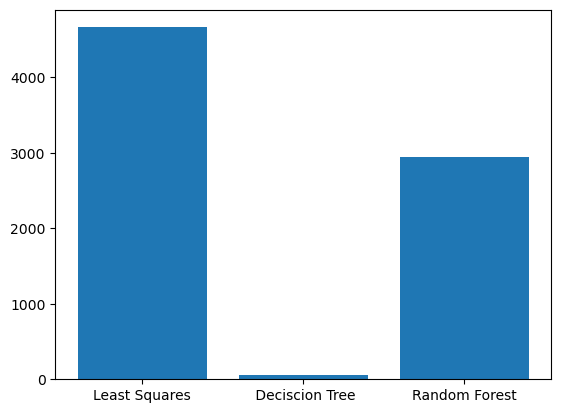

In [305]:
# Compare model performance
Model = ['Least Squares', ' Deciscion Tree', 'Random Forest']
Model_names = [fitted, regr_tree, cls]
modelperf = []
for i in Model_names:
    y_predtest = i.predict(X_test)
    rmse = round(np.sqrt(mean_squared_error(y_predtest, Y_test)), 0)
    modelperf.append(rmse)

Dict = {'Model': Model, 'Rmse score': modelperf}
model_performance = pd.DataFrame(Dict)

# Create bars
plt.bar(model_performance['Model'], model_performance['Rmse score'])

# Show graphic
plt.show()

Choose best model and motivate why it is the best choice
The best model is chosen based the lowest rmse score on the test data
According to the test rmse score of the three models we found that deciscion tree regression produced the best result for this data. However, for producing the predictions for the competition we found that the model did not perform as well as the Random Forest regression model. It is clear that the Deciscion Tree regression model did overfit to the train data which made it perform poorly on unseen data. The Random Forest Model was the best performing model for new data and consequently it was chosen to make predictions.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Based on our Explanatory Data analysis, a number of features were non-linear when plotted. This was clear indication that the data would perform poorly when linearly fitted. From our results, linear model performed RMSE 4686.47. The first thing to decide while employing a decision tree model is the root node. The Model choses a best split point of the predictor variable and calculates the minimal MSE on both sides of the best split point. This happens for all the predictor variables picking only the best. After the data is split into 2 subsets based on selected split, it is repeated until a suitable ending criteria is arrived at. Using sci-kit learn our model was fitted to the training data, and used to predict on the Test data, with a test error of RMSE ; 4574.26 on the competition. Considering the fact that our data frame was having many features, we decided to use SelectKBest library to select the features according to the k highest score. This helped us to eliminate less important part of the data and reduce a training time. After feature selection, we used Grid Search Cross-Validation to fine tune the parameters.This process helped us to choose the best combination of the parameters for our model. We used the selected features and the best combination of parameters to train our Random Forest Regression model which produced a prediction of Rmse 4375.